<a href="https://colab.research.google.com/github/kwekukuum/Big_Data/blob/main/DataVisualizationGroup7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA IMPORT**

In [71]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [106]:
df.shape

(32560, 15)

**ASSIGNING FEATURE NAMES**

In [72]:
#set variable column_names and assign column names to data
column_names = ['age','workclass','fnlwgt','education','education-num', 'marital-status','occupation','relationship','race','sex','capital-gain','capital-loss', 'hrs-per-wk','native-country','income']

df.columns = column_names

#alternatively
#df.columns=['age','workclass'.....]


In [79]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-wk,native-country,income
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [50]:
df['relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#plt.figure(figsize=(10,6))
import pylab
%matplotlib inline
plt.rcParams["axes.grid"] = False

In [15]:
df['race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

**PREPROCESSING**

In [39]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hrs-per-wk        0
native-country    0
income            0
dtype: int64

In [40]:
df.nunique()

age                  73
workclass             9
fnlwgt            21647
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hrs-per-wk           94
native-country       42
income                2
dtype: int64

**NULL VALUES SEARCH**

In [7]:
df['workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [20]:
df['workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1278
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [8]:

df['occupation'].value_counts()


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

**DROP ALL RECORDS WITH NULL VALUES IN CORRESPONDING COLUMN**

In [74]:
df.replace(' ?', pd.NaT, inplace=True)
df.dropna(inplace=True)


#alternatively replace with mode
#df['workclass'] = df['workclass'].replace('?', 'Private')
#df['native-country'] = df['native-country'].replace('?', 'United-States')

df.shape

(30161, 15)

**DATA EXPLORATION**

In [110]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hrs-per-wk', 'native-country',
       'income'],
      dtype='object')

In [10]:
df['native-country'].value_counts()

 United-States                 27503
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [44]:
df['income'].value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

In [76]:
# sns.lineplot(x='workclass', y = 'income', data=df)
# plt.title('workclass and income distribution')
# plt.xticks(rotation=45)
# #sns.pairplot(df, hue="income", palette="husl", size=3)
# plt.show()

# df.shape

**DATA VISUALIZATION AND INSIGHT GATHERING**

Text(0.5, 1.0, 'income by sex')

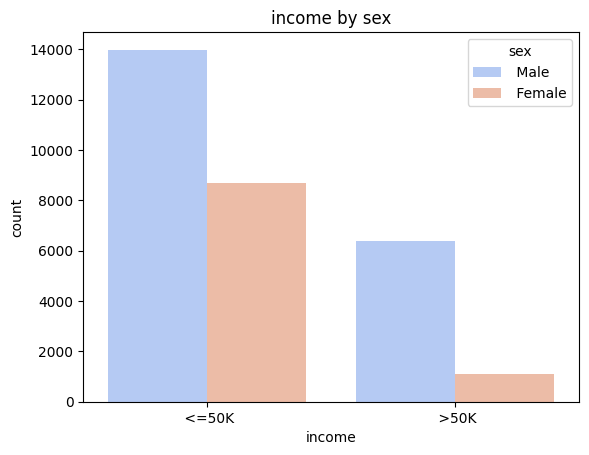

In [11]:
#distribution of gender and income
sns.countplot(x='income', palette='coolwarm', hue='sex', data=df)

plt.title("income by sex")

Text(0.5, 1.0, 'income by race')

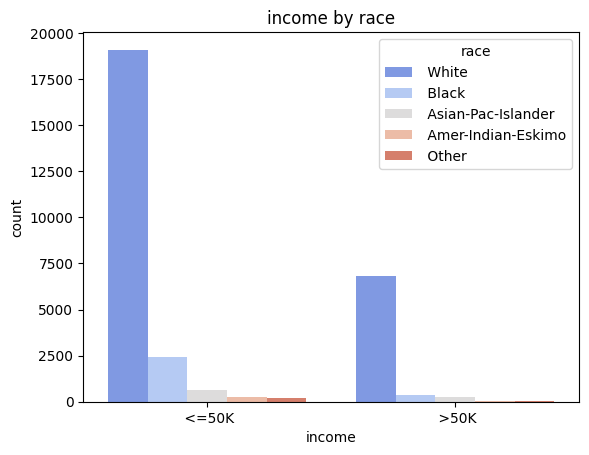

In [159]:
#distribution of race and income
sns.countplot(x='income', palette='coolwarm', hue='race', data=df)

plt.title("income by race")

Text(0.5, 1.0, 'income by relationship')

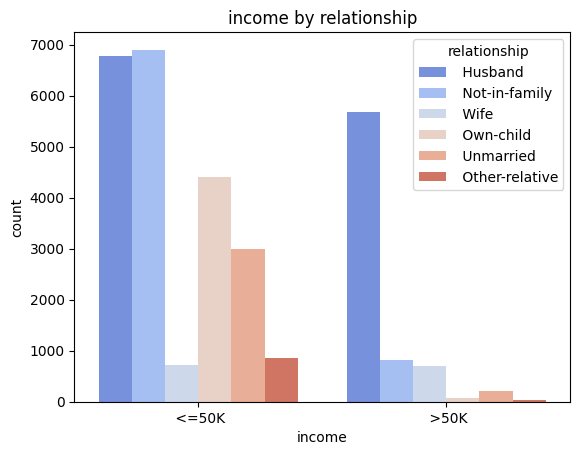

In [160]:
#distribution of relationship and income
sns.countplot(x='income', palette='coolwarm', hue='relationship', data=df)

plt.title("income by relationship")

Text(0.5, 1.0, 'distribution of education level')

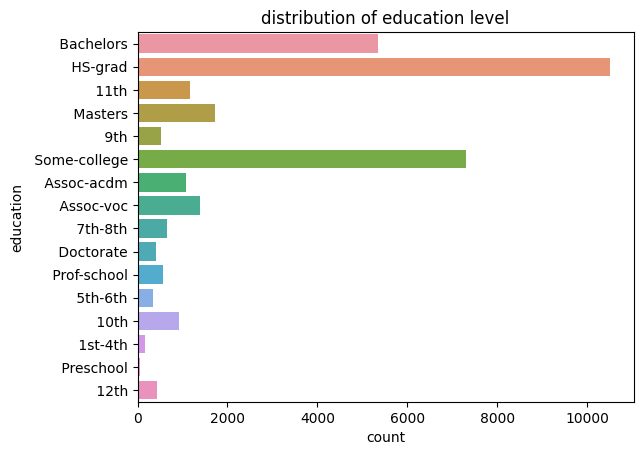

In [112]:
#education level distribution
sns.countplot(y='education', data=df)
plt.title('distribution of education level')

Text(0.5, 1.0, 'income by occupation')

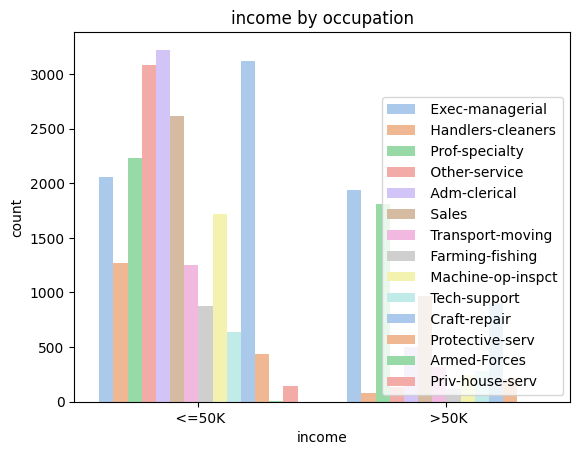

In [161]:
#income and occupation distribution insight
sns.countplot(x='income', palette='pastel', hue='occupation', data=df)

plt.legend(loc='lower right')
plt.title("income by occupation")


Text(0.5, 1.0, 'distribution of income level')

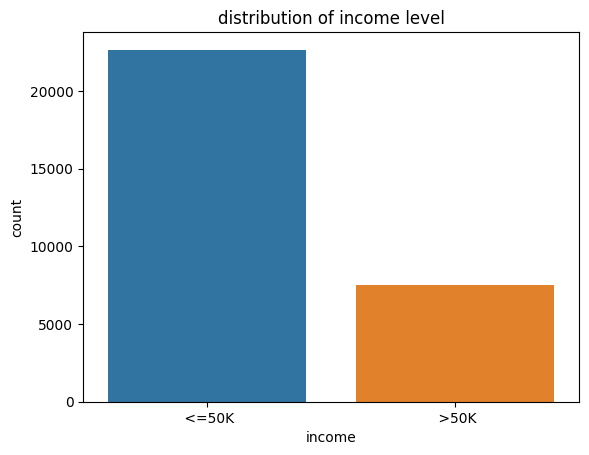

In [162]:
#income level count distribution
sns.countplot(x='income', data=df)
plt.title('distribution of income level')

Text(0.5, 1.0, 'distribution of age')

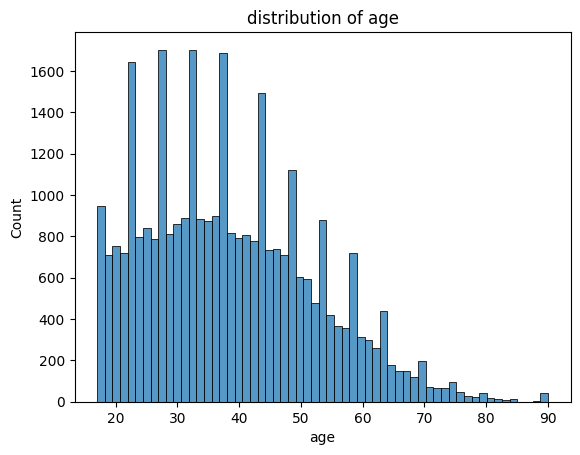

In [55]:
#age distribution
sns.histplot(df['age'], kde=False)
plt.title('distribution of age')

**QUESTION 1:age and income level corelation?**

Text(0.5, 1.0, 'distribution of age and income level')

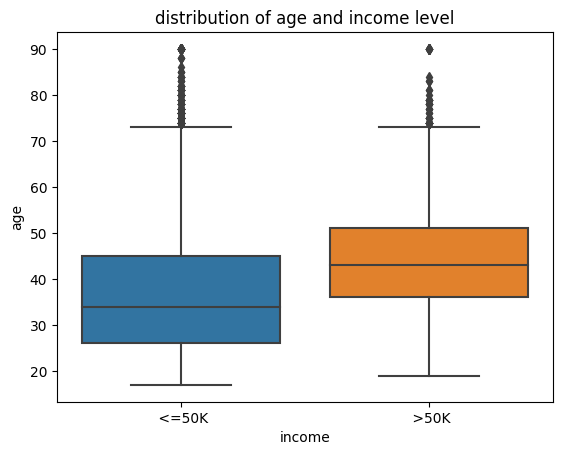

In [163]:
#age group and income level insight
sns.boxplot(x='income', y = "age",data=df)
plt.title('distribution of age and income level')

In [18]:
#sns.pairplot(df, hue="native-country", palette="husl", size=3)

**DATA TRANSFORMATION**

In [52]:
import numpy as np


category_data = df.select_dtypes(exclude=[np.number]).columns
df[category_data].head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


**LABEL ENCODING**

In [77]:
#Label econding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in category_data:
    df[i] = label_encoder.fit_transform(df[i])


df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hrs-per-wk,native-country,income
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [37]:
df['education'].unique()

array([ 9, 11,  1, 12,  6, 15,  7,  8,  5, 10, 14,  4,  0,  3, 13,  2])

**QUESTION 2:IS THERE A STRONG CORELATION BETWEEN INCOME AND LEVEL OF EDUCATION?**

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(-2.0, 0, '−2'),
  Text(0.0, 0, '0'),
  Text(2.0, 0, '2'),
  Text(4.0, 0, '4'),
  Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16')])

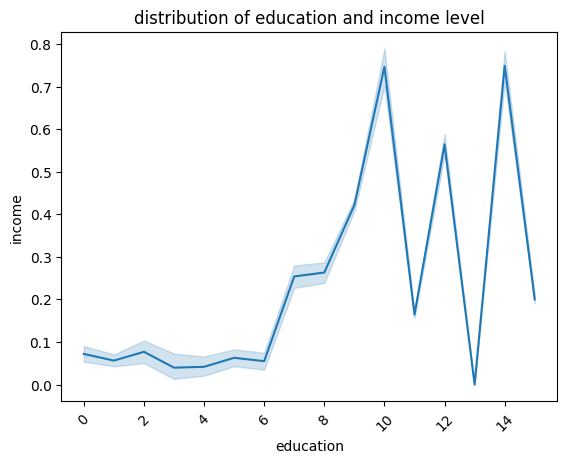

In [21]:
#sns.heatmap(x='income', y = "education",data=df)
#plt.title('distribution of education and income level')
# import seaborn as sns
# import matplotlib.pyplot as plt

# income_education = df[['income','education']]

# corr_matrix = income_education.corr()

# sns.heatmap(corr_matrix, annot=True, cmap ='coolwarm')
# plt.show()

sns.lineplot(y='income', x = "education",data=df)
plt.title('distribution of education and income level')
plt.xticks(rotation=45)

In [ ]:
#10= Doctarate, 14=prof-school

In [66]:
#df['education'].value_counts()

**HOURS PER WEEK OF WORK AND AGE RELATIONSHIP**

In [78]:
# age_workhours = df[['age','hrs-per-wk']].corr()

# #corr_matrix = income_education.corr()

# #sns.heatmap(corr_matrix, annot=True, cmap ='coolwarm')
# sns.heatmap(age_workhours, annot=True, cmap ='coolwarm')
# plt.show()

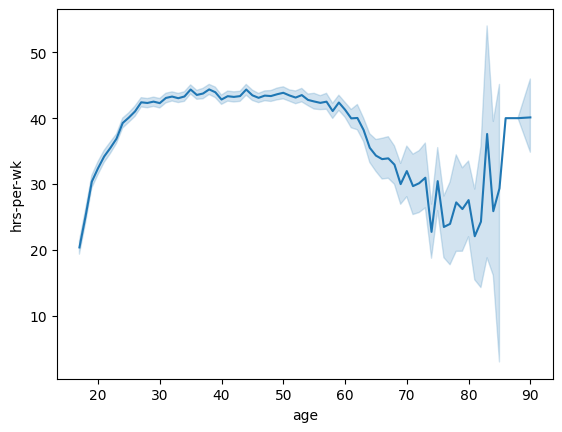

(30161, 15)

In [23]:
sns.lineplot(x='age', y = 'hrs-per-wk', data=df)
# plt.title('distribution of race and income level')

#sns.pairplot(df, hue="income", palette="husl", size=3)
plt.show()

df.shape

**ANY IDENTIFIABLE TREND IN WORKCLASS AND INCOME?**

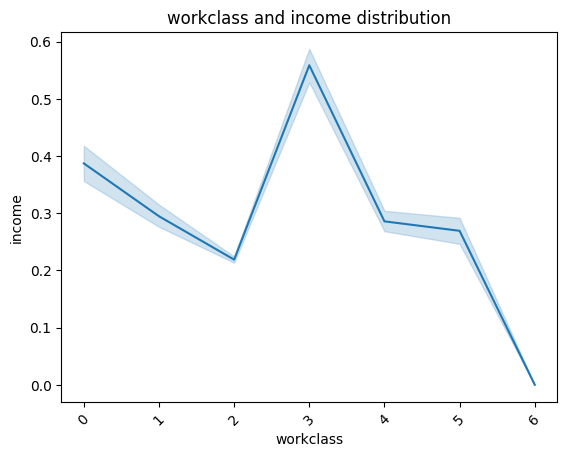

(30161, 15)

In [25]:

sns.lineplot(x='workclass', y = 'income', data=df)
plt.title('workclass and income distribution')
plt.xticks(rotation=45)
#sns.pairplot(df, hue="income", palette="husl", size=3)
plt.show()

df.shape

In [ ]:
#0=selfemployed, 1=private, 2=state-gov, 3=federal-gov, 4localgov, 5 self-employed, 6=withoutpay

**IS THERE ANY RELATIONSHIP BETWEEN HOURS PER WEEK OF WORK AND INCOME LEVEL?**

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

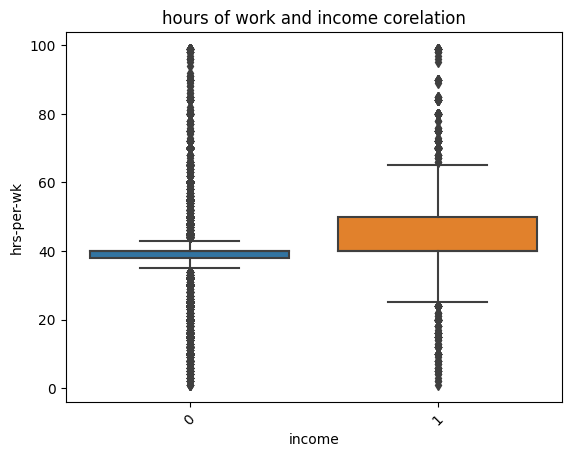

In [26]:

sns.boxplot(x='income', y = "hrs-per-wk",data=df)
plt.title('hours of work and income corelation')
plt.xticks(rotation=45)

In [41]:
# sns.boxplot(y='income', x = "capital-gain",data=df)
# plt.title('capital gain income corelation')
# plt.xticks(rotation=45)

Text(0.5, 1.0, 'Capital Gain vs Income')

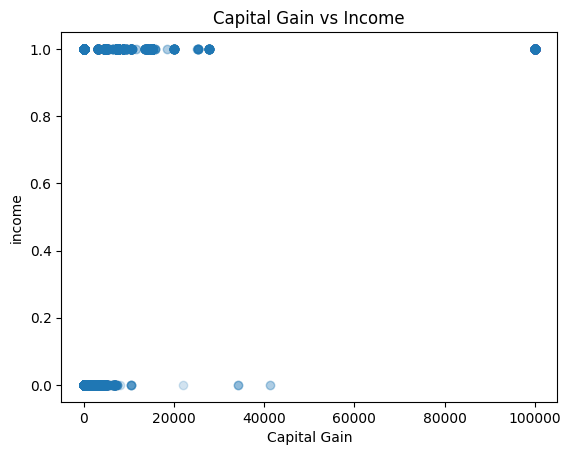

In [28]:
plt.scatter(df['capital-gain'],df['income'], alpha=0.2)
plt.xlabel('Capital Gain')
plt.ylabel('income')
plt.title('Capital Gain vs Income')

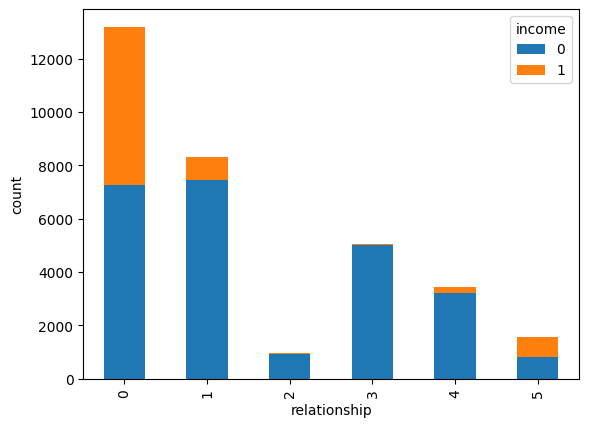

In [42]:
import matplotlib.pyplot as plt

income_by_relationshp = df.groupby(['relationship', 'income']).size().unstack()
income_by_relationshp.plot(kind ='bar', stacked=True)
plt.xlabel('relationship')
plt.ylabel('count')
plt.show()

In [ ]:
#0 =husband, 1 =notfamily, 5 =wife, 3=ownchild, 4 unmarried 5=other

**income level and marital status correlation**

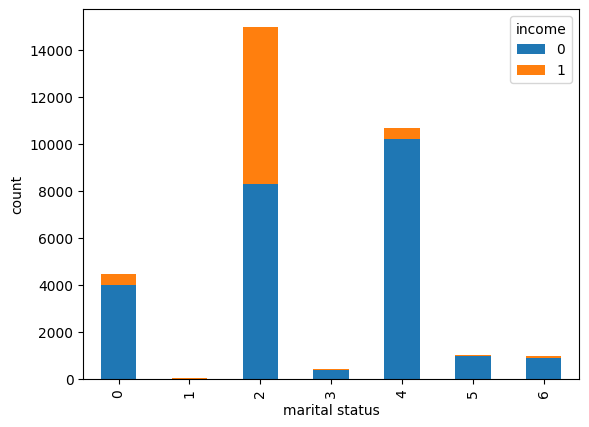

In [54]:
income_by_marital = df.groupby(['marital-status', 'income']).size().unstack()
income_by_marital.plot(kind ='bar', stacked=True)
plt.xlabel('marital status')
plt.ylabel('count')
plt.show()

In [ ]:
#0 =divorced, 1= married-AF-spouse, 2= married-civ-spouse, 3 =married-spouse-absent, 4=never-married, 5-separated, 6=widowed 